In [1]:
%matplotlib inline

# Un vistazo a los datos
Vamos a cargar el vector de características.

In [2]:
from dns_attacks_detection import *

In [3]:
dns = create_feature_vector_from_log_file('3JUL.log', extract_features_reduced)

In [4]:
dns.head()

,alphanumeric,attack,longest_number
0,1.0,0,0.0
1,1.0,0,0.0
2,1.0,0,0.0
3,1.0,0,0.0
4,1.0,0,0.0


In [5]:
dns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 3 columns):
alphanumeric      52610 non-null float64
attack            52610 non-null int64
longest_number    52610 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.2 MB


In [6]:
dns.describe()

,alphanumeric,attack,longest_number
count,52610.000000,52610.000000,52610.000000
mean,0.998346,0.050960,0.102316
std,0.013217,0.219918,0.266150
min,0.750000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


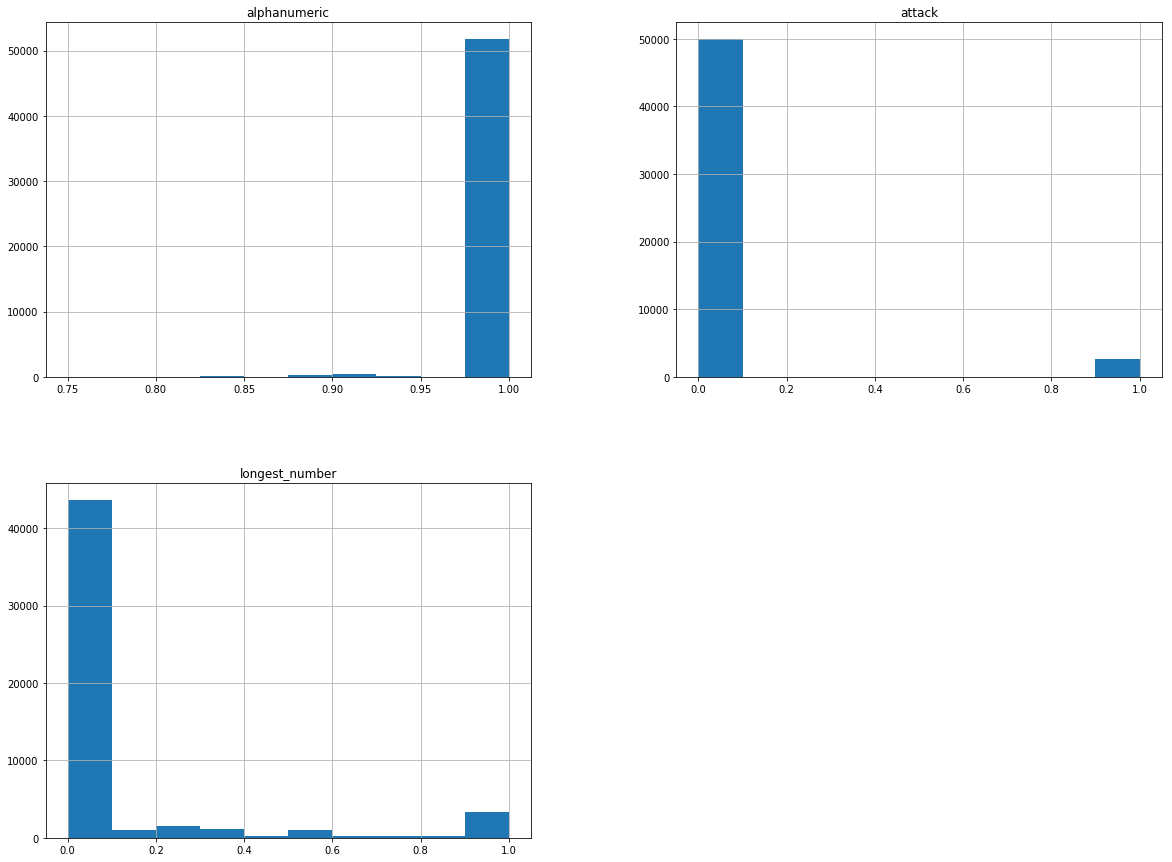

In [7]:
dns.hist(figsize=(20,15))
plt.show()

# Creación de un "test set"
Creación usando "stratified sampling" dependiendo si una consulta es un ataque o no.

In [8]:
train_set, test_set = split_train_and_test_sets(dns, 'attack')

In [9]:
train_set['attack'].value_counts() / len(train_set)

0    0.949035
1    0.050965
Name: attack, dtype: float64

In [10]:
test_set['attack'].value_counts() / len(test_set)

0    0.949059
1    0.050941
Name: attack, dtype: float64

El conjunto de entrenamiento y el conjunto de test tienen proporciones similares.

# Descubrir y visualizar los datos

In [11]:
train_set_copy = train_set.copy()

Buscando correlaciones: comprobemos si algún atributo se correlaciona con el atributo de ataque.

In [12]:
corr_matrix = train_set_copy.corr()
corr_matrix['attack'].sort_values(ascending=False)

attack            1.000000
longest_number    0.241213
alphanumeric      0.029131
Name: attack, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b3eeb8b70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5b3ed01e48>]], dtype=object)

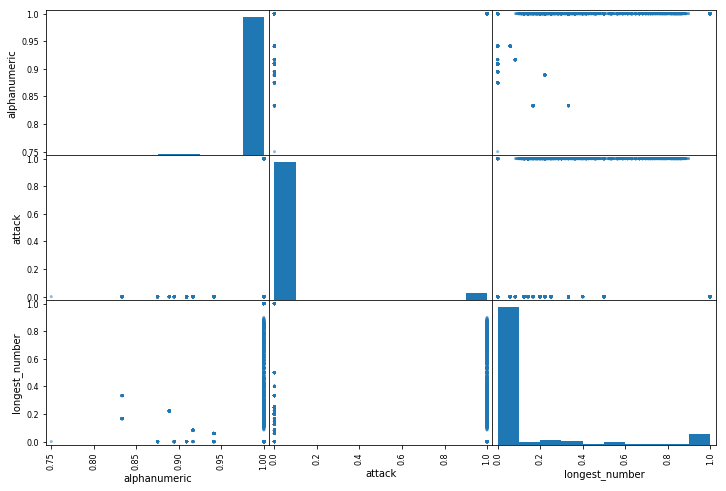

In [13]:
attributes = train_set_copy.columns
scatter_matrix(train_set_copy[attributes], figsize=(12, 8))

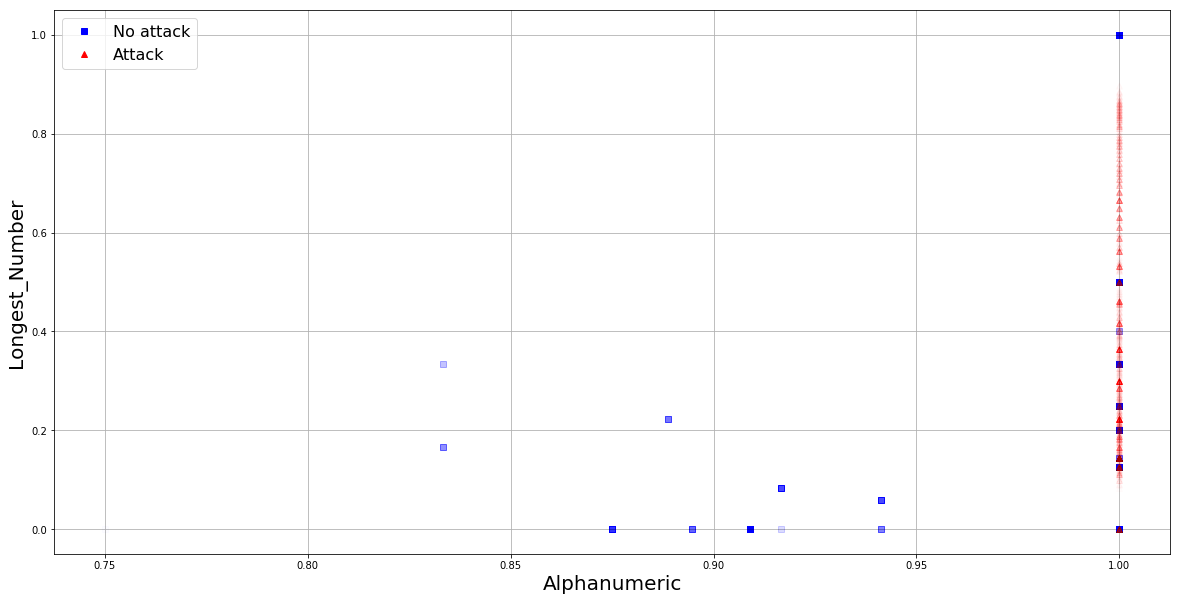

In [14]:
def plot_dataset(dataset):
    X = dataset.drop("attack", 1).values
    y = dataset["attack"].values
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", alpha=0.01, label="No attack")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", alpha=0.01, label="Attack")
    plt.grid(True, which='both')
    plt.xlabel("Alphanumeric", fontsize=20)
    plt.ylabel("Longest_Number", fontsize=20)
    leg = plt.legend(loc="upper left", fontsize=16)
    # In order to show the legend with an alpha of 1
    for lh in leg.legendHandles:
        lh._legmarker.set_alpha(1)

plt.figure(figsize=(20, 10))
plot_dataset(train_set_copy)
plt.show()

En principio, estas dos características no parecen suficientes para determinar los ataques. De todas formas, continuemos con el análisis y la creación de modelos. Más adelante usaremos un vector con más características.

Veamos los valures únicos de los diferentes atributos.

In [15]:
for attribute in attributes:
    print(color.BOLD, attribute.upper(), color.END, train_set_copy.groupby(attribute).nunique(), "\n\n")

 ALPHANUMERIC                alphanumeric  attack  longest_number
alphanumeric                                      
0.750000                 1       1               1
0.833333                 1       1               2
0.875000                 1       1               1
0.888889                 1       1               1
0.894737                 1       1               1
0.909091                 1       1               1
0.916667                 1       1               2
0.941176                 1       1               2
1.000000                 1       2             328 


 ATTACK          alphanumeric  attack  longest_number
attack                                      
0                  9       1              13
1                  1       1             327 


 LONGEST_NUMBER                  alphanumeric  attack  longest_number
longest_number                                      
0.000000                   7       2               1
0.058824                   1       1               1


# Seleccionar y entrenar un modelo

In [16]:
features = train_set.drop('attack', 1)
features

,alphanumeric,longest_number
19038,1.0,0.000000
34347,1.0,0.000000
38293,1.0,0.000000
15027,1.0,0.000000
32646,1.0,0.000000
18206,1.0,0.210526
40710,1.0,0.000000
47415,1.0,0.000000
21099,1.0,0.000000
10444,1.0,0.000000


In [17]:
labels = train_set['attack']
labels

19038    0
34347    0
38293    0
15027    0
32646    0
18206    1
40710    0
47415    0
21099    0
10444    0
20086    0
46941    0
22703    1
27980    0
29957    0
21281    0
37689    0
35961    0
7664     1
23435    0
37630    0
35801    0
6023     0
7777     0
33452    0
20629    0
46080    0
3813     0
19759    0
2792     0
        ..
19146    0
45370    0
2599     0
9440     0
20665    0
40669    0
17967    0
21537    0
40308    0
41310    0
39340    0
26520    0
10041    0
3399     0
20828    0
21972    0
25180    0
26146    0
14883    0
32959    0
38584    0
14303    0
4482     0
19699    0
29817    0
38981    0
1251     0
29917    0
46138    0
18349    0
Name: attack, Length: 42088, dtype: int64

## Stochastic Gradient Descent (SGD) classifier

In [18]:
sgd_clf = SGDClassifier(max_iter=5, random_state=13)
sgd_clf.fit(features, labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=13, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
some_data = features[:10]
some_labels = labels[:10]
print("Predictions:", sgd_clf.predict(some_data))
print("Labels", list(some_labels))

Predictions: [0 0 0 0 0 0 0 0 0 0]
Labels [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.
"cross_val_predict" realiza "K-fold cross-validation" devolviendo las predicciones realizadas en cada "test fold".

In [20]:
train_predicted_labels = cross_val_predict(sgd_clf, features, labels, cv=5)

In [21]:
confusion_matrix(labels, train_predicted_labels)

array([[39943,     0],
       [ 2145,     0]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [22]:
precision_score(labels, train_predicted_labels)

/home/alex/Documentos/URJC/TFG_DNS/logs_machine_learning/end_to_end/venv3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [23]:
recall_score(labels, train_predicted_labels)

0.0

In [24]:
f1_score(labels, train_predicted_labels)

/home/alex/Documentos/URJC/TFG_DNS/logs_machine_learning/end_to_end/venv3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

### Análisis

Con el modelo anterior, la precisión y exhaustivdad son 0, por lo que es totalmente inutilizable. Analicemos porqué.
Primero, obtengamos la puntuación para todas las predicciones.

In [25]:
labels_scores = cross_val_predict(sgd_clf, features, labels, cv=5, method="decision_function")

In [26]:
labels_scores

array([-1.05272064, -1.05272064, -1.05272064, ..., -1.04999186,
       -1.04999186, -1.04999186])

Las puntuaciones viven entre los valores -1.271 y -0.935:

In [27]:
labels_scores.min()

-1.2712364366104159

In [28]:
labels_scores.max()

-0.93593963133582503

Tracemos la curva de precisión vs. exhaustividad.

In [29]:
precisions, recalls, thresholds = precision_recall_curve(labels, labels_scores)

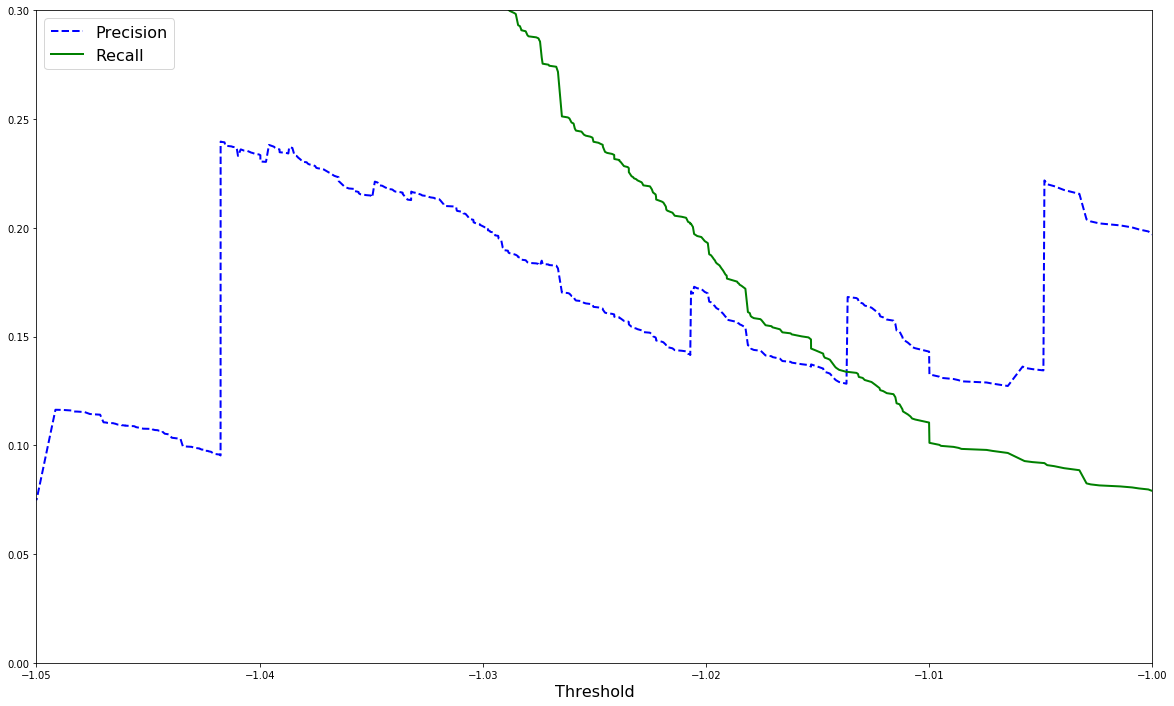

In [30]:
plt.figure(figsize=(20, 12))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-1.05, -1])
plt.ylim([0, 0.3])
plt.show()

El valor más alto para la precisión es sobre 0.25, cuando el umbral está en -1.04. Ajustemos el umbral para alcanzar ese nivel de precisión.

In [31]:
labels_train_pred_25 = (labels_scores > -1.04)

In [32]:
confusion_matrix(labels, labels_train_pred_25)

array([[36669,  3274],
       [ 1148,   997]])

In [33]:
precision_score(labels, labels_train_pred_25)

0.2334347927885741

In [34]:
recall_score(labels, labels_train_pred_25)

0.46480186480186481

In [35]:
f1_score(labels, labels_train_pred_25)

0.31078553615960103

## Logistic Regression (SGD) classifier

In [36]:
log_reg_clf = LogisticRegression(random_state=13, solver='liblinear')
log_reg_clf.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=13, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
some_data = features[:10]
some_labels = labels[:10]
print("Predictions:", log_reg_clf.predict(some_data))
print("Labels", list(some_labels))

Predictions: [0 0 0 0 0 0 0 0 0 0]
Labels [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.
"cross_val_predict" realiza "K-fold cross-validation" devolviendo las predicciones realizadas en cada "test fold".

In [38]:
train_predicted_labels = cross_val_predict(log_reg_clf, features, labels, cv=5)

In [39]:
confusion_matrix(labels, train_predicted_labels)

array([[39943,     0],
       [ 2145,     0]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [40]:
precision_score(labels, train_predicted_labels)

/home/alex/Documentos/URJC/TFG_DNS/logs_machine_learning/end_to_end/venv3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [41]:
recall_score(labels, train_predicted_labels)

0.0

In [42]:
f1_score(labels, train_predicted_labels)

/home/alex/Documentos/URJC/TFG_DNS/logs_machine_learning/end_to_end/venv3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

Después de analizar dos modelos, no parece que con este vector de características den muchos resultados, incluso si estos no son los mejores modelos para este tipo de datos. En otro cuaderno se realizará un análisis de más modelos usando otro tipo de vector de características.